# Convolutional neural networks

Convolution neural networks (CNNs) are a type of neural network that have been very successful in image recognition and classification. One of the first, created in the late 80s was called LeNet. At the time it was mostly used for character recogntion tasks, such as the recognition of handwriting to help automate deliveries in the post office. Later in the 2010s CNNs resurfaced in popularity, this was largely because they performed extermemly well in an annual image recognition [competetion](https://en.wikipedia.org/wiki/ImageNet#ImageNet_Challenge), in some cases outperforming humans. 

Convolutional networks in additional to the normal fully connected layers also contain some additonal type of layers, namely convolutional layers and pooling layers. There are also some commonly used terms such as padding, stride and kernel that we use to describe the convlution operation, well discuss these later.



# Convolution

What is a convolution? We can think of it intuitively as a type of filtering process. The convolution operation allows us to perform feature extraction, or determine the most important parts of an image. The figure bellow depicts a convolution.

![convultion example](http://deeplearning.net/software/theano/_images/numerical_no_padding_no_strides.gif)


The kernel (or filter) in the image above is the dark blue box sliding over the matrix .

$$ \quad \begin{pmatrix}
0 & 1 & 2 \\
2 & 2 & 0 \\
0 & 1 & 2
\end{pmatrix}
$$

We slide the kernel over the input and for each element that overlaps between the kernel and the input we calculate the product. We then sum the results to obtain the an output.
A good video explaning how [kernel](https://www.youtube.com/watch?v=C_zFhWdM4ic) are used in image processing

### Edge detection

The simplest feature we can extract is an edge, by using filters with particular values we can detect edges. For example the bellow kernel is a example of a verticle edge detectors.

 $$ \quad \begin{pmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{pmatrix}
$$

One commonly used edge detector is called the sobel filter. It is composed of two filters a horizonal one and a vertical one, shown bellow.






![Sobel filter](http://aishack.in/static/img/tut/conv-sobel.jpg)

Bellow is an example of appyling a sobel filter to a image, note how it sharpens the edges.


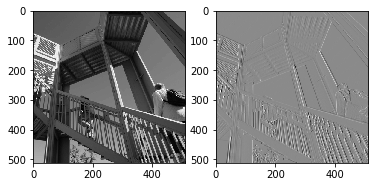

In [1]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

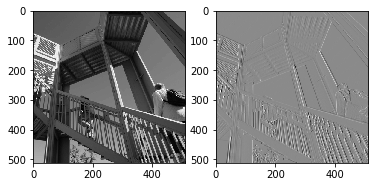

In [1]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()



We can treat the kernels values as weights in our network, through training our network will learn there values, and hence how to extract certain features. The kernels in earlier layers of the network will learn to detect simple features such as lines. In later layers they can combine these features to detect more complex features like an edge or corner . As you move progressively deeper into the network it keeps combinining feature detctors eventually allowing it to classify objects like a boat or a house.


## Pooling 

Pooling helps to reduce the dimensionality of the data, reducing the number of weights, allowing us to train our models faster and prevent overfitting. [Max pooling](https://www.quora.com/What-is-max-pooling-in-convolutional-neural-networks) is commonly used which simply takes the greatest value from a group of numbers.

![max pooling](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=494)

The intution behind using pooling being if a feature exists in that region we're not to worried if it's a single pixel over but just that it is present within that patch.


## Padding

Padding is adding addtional zeros around the edge of a matrix. With convolution the images will shrink each convolution, so if we want the output matrix to be of the same size we have to pad the input matrix. In addtion without padding we don't use the pixels in the corners and edge of the image to there fullest. 


![padding](http://deeplearning.net/software/theano/_images/same_padding_no_strides.gif)

## Stride

We can also slide the kernel by more than one step each time, the number of steps we move the kernel by is called the stride. Below is an example with a stride of 2.

![2 stride](http://deeplearning.net/software/theano/_images/no_padding_strides.gif)

## Convolutions with volume

All of the above examples explain how convolution can be applied to 2D matrixes (or grey scale images) but an image is in 3D. Essentialy instead of sliding a small square over a larger sqaure, when were in 3D we slide a small cube inside a larger cube. This is easier to understand when you view it so watch [this vid](https://www.youtube.com/watch?v=0RcqZHIyQuo).






# Convolutions with tensorflow

In the section well explore convolutions using tensorflow.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
%matplotlib inline

C:\Users\Brian Tsang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
%matplotlib inline

The image has a shape which describes it's height, width and 3 colour channels (RGB).

In [4]:
img = plt.imread("imgs/cat.jpeg")
img.shape

(400, 400, 3)

In [80]:
img = plt.imread("imgs/cat.jpeg")
img.shape

(225, 225, 3)

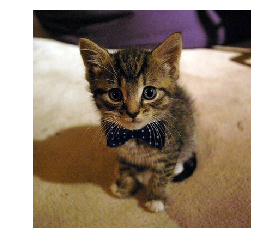

In [5]:
plt.imshow(img)
plt.axis("off");

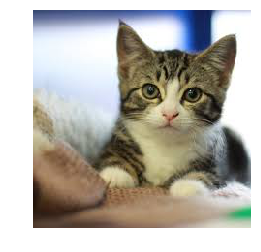

In [81]:
plt.imshow(img)
plt.axis("off");

We can convert to grey scale by taking the mean across all of the colour channels.

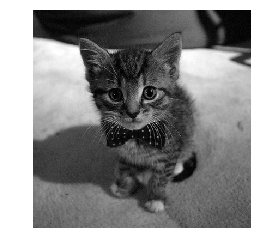

In [6]:
grey_img = np.mean(img,axis=2)
plt.imshow(grey_img,cmap="gray")
plt.axis("off");

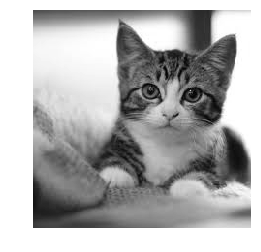

In [108]:
grey_img = np.mean(img,axis=2)
plt.imshow(grey_img,cmap="gray")
plt.axis("off");

In order to perform convlution in Tensorflow we need our image to be 4D, what each dimension means is shown bellow.


$$ N \times H \times W \times C = images $$

* $ N $ - number of images
* $ H $ - height of images
* $ W $ - width of images
* $ C $ - number of channels 

Lets reshape the image to add the batch dimension. We'll work with the grey image since the effect of the edge detection are clearer to see on grey scale vs rgb. We also need to convert the image to float32 since this is the datatype GPUs work well with.

In [7]:
X = tf.reshape(grey_img.astype("float32"), [1]+ list(grey_img.shape) + [1])
X

<tf.Tensor 'Reshape:0' shape=(1, 400, 400, 1) dtype=float32>

In [109]:
X = tf.reshape(grey_img.astype("float32"), [1]+ list(grey_img.shape) + [1])
X

<tf.Tensor 'Reshape_25:0' shape=(1, 225, 225, 1) dtype=float32>

Convlution kernel dimensitons

$$ K_H  \times K_W \times I  \times O $$

* $ K_H $ - kernel height
* $ K_W $ - kernel width
* $ I $ - number of input channels
* $ O $ - number of output channels


Next we need to create a kernel to use.

In [8]:
kernel = np.array([[-1, 0, 1], 
                   [-1, 0, 1], 
                   [-1, 0, 1]]).astype("float32")


kernel = tf.reshape(kernel,[3,3,1,1])
kernel

<tf.Tensor 'Reshape_1:0' shape=(3, 3, 1, 1) dtype=float32>

In [110]:
kernel = np.array([[-1, 0, 1], 
                   [-1, 0, 1], 
                   [-1, 0, 1]]).astype("float32")


kernel = tf.reshape(kernel,[3,3,1,1])
kernel

<tf.Tensor 'Reshape_26:0' shape=(3, 3, 1, 1) dtype=float32>

In [9]:
result = tf.nn.conv2d(X,kernel, strides=[1,1,1,1],padding="SAME")
with tf.Session() as sess:
    new_img = result.eval()

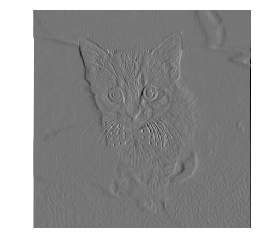

In [10]:
plt.imshow(np.squeeze(new_img),cmap="gray")
plt.axis("off");

In [111]:
result = tf.nn.conv2d(X,kernel, strides=[1,1,1,1],padding="SAME")
with tf.Session() as sess:
    new_img = result.eval()

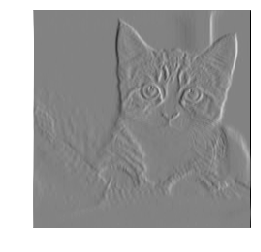

In [112]:
plt.imshow(np.squeeze(new_img),cmap="gray")
plt.axis("off");

We could make this code more generic by using a placeholder, that way we can pass in an image of any shape.

In [13]:
image_2d = tf.placeholder(tf.float32, shape=[None,None])
image_3d = tf.expand_dims(image_2d, 0)
image_4d = tf.expand_dims(image_3d ,3)
image_4d.shape.as_list()

[1, None, None, 1]

In [113]:
image_2d = tf.placeholder(tf.float32, shape=[None,None])
image_3d = tf.expand_dims(image_2d, 0)
image_4d = tf.expand_dims(image_3d ,3)
image_4d.shape.as_list()

[1, None, None, 1]

In [18]:
kernel_4d = kernel

In [19]:
result= tf.nn.conv2d(image_4d, kernel_4d,
                          strides=[1, 1, 1, 1], padding='SAME')

In [22]:
with tf.Session() as sess:
    img_one = sess.run(result,{image_2d:grey_img})
    #img_two = sess.run(result,{image_2d:data.camera()})
    

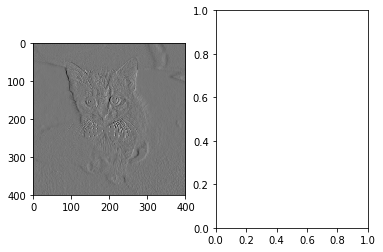

In [24]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(np.squeeze(img_one),cmap="gray")
#axs[1].imshow(np.squeeze(img_two),cmap="gray")

In [116]:
result= tf.nn.conv2d(image_4d, kernel_4d,
                          strides=[1, 1, 1, 1], padding='SAME')

In [119]:
with tf.Session() as sess:
    img_one = sess.run(result,{image_2d:grey_img})
    img_two = sess.run(result,{image_2d:data.camera()})
    

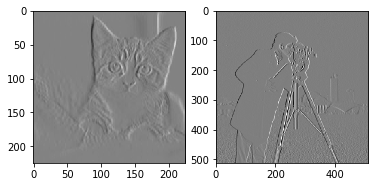

In [120]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(np.squeeze(img_one),cmap="gray")
axs[1].imshow(np.squeeze(img_two),cmap="gray")

# References

* [Intuitive explanation of convnets](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)
* [Kernels in image processing](https://www.youtube.com/watch?v=C_zFhWdM4ic)
* [Convents introduction](http://colah.github.io/posts/2014-07-Conv-Nets-Modular/)
* [Thenano convlution explaination](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html)
* [Interactive kernels demonstration](http://setosa.io/ev/image-kernels/)
* [Convlutions with tensorflow](https://www.youtube.com/watch?v=ETdaP_bBNWc)
